In [6]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [7]:
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
data = pd.read_csv('drive/MyDrive/emotions.csv')

# Display the first few rows to verify it loaded correctly
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [8]:
data.shape

(416809, 2)

In [9]:
data.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# Data Preprocessing (Text Cleaning & Feature Engineering)

In [10]:
import pandas as pd
import re
import numpy as np
!pip install unidecode
from unidecode import unidecode
import string


import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.0 MB/s eta 0:00:00


In [11]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function to clean and preprocess headlines
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return " ".join(words)

# Apply text cleaning to text
data["Cleaned_text"] = data["text"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [12]:
data.head()

,text,label,Cleaned_text
0,i just feel really helpless and heavy hearted,4,feel really helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,4,gave internship dmrg feeling distraught
3,i dont know i feel so lost,0,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughly weary job take...


# Exploratory Data Analysis (EDA)

In [13]:
# Display the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
                                                text  label  \
0      i just feel really helpless and heavy hearted      4   
1  ive enjoyed being able to slouch about relax a...      0   
2  i gave up my internship with the dmrg and am f...      4   
3                         i dont know i feel so lost      0   
4  i am a kindergarten teacher and i am thoroughl...      4   

                                        Cleaned_text  
0                 feel really helpless heavy hearted  
1  ive enjoyed able slouch relax unwind frankly n...  
2            gave internship dmrg feeling distraught  
3                                dont know feel lost  
4  kindergarten teacher thoroughly weary job take...  


a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4) and surprise(5)

In [14]:
# Basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          416809 non-null  object
 1   label         416809 non-null  int64 
 2   Cleaned_text  416809 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.5+ MB


In [15]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
text            0
label           0
Cleaned_text    0
dtype: int64


In [16]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))


Summary Statistics:
                                                 text          label  \
count                                          416809  416809.000000   
unique                                         393822            NaN   
top     i feel more adventurous willing to take risks            NaN   
freq                                               16            NaN   
mean                                              NaN       1.554271   
std                                               NaN       1.490453   
min                                               NaN       0.000000   
25%                                               NaN       0.000000   
50%                                               NaN       1.000000   
75%                                               NaN       3.000000   
max                                               NaN       5.000000   

         Cleaned_text  
count          416809  
unique         381941  
top     feel accepted  
freq              

In [17]:
# Checking unique values in each colum
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"\nUnique values in {column}: {unique_values}")


Unique values in text: 393822

Unique values in label: 6

Unique values in Cleaned_text: 381941


# Visualization

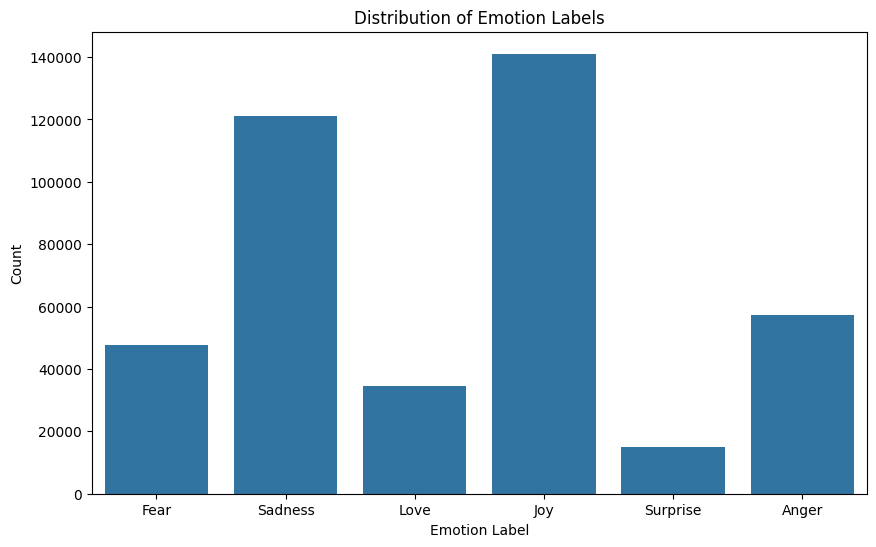

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map numeric labels to emotion names
emotion_mapping = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}
data['label'] = data['label'].map(emotion_mapping)  # Replace labels with names

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='label')

plt.title("Distribution of Emotion Labels")
plt.xlabel("Emotion Label")
plt.ylabel("Count")
plt.show()

In [19]:
# ✅ Ensure the column is created
data["Cleaned_text_length"] = data["Cleaned_text"].apply(len)

# ✅ Now run the checks
print(data.head())  # Check data structure
print(data["label"].unique())  # Check unique labels
print(data["Cleaned_text_length"].describe())  # Summary of sentence lengths

                                                text    label  \
0      i just feel really helpless and heavy hearted     Fear   
1  ive enjoyed being able to slouch about relax a...  Sadness   
2  i gave up my internship with the dmrg and am f...     Fear   
3                         i dont know i feel so lost  Sadness   
4  i am a kindergarten teacher and i am thoroughl...     Fear   

                                        Cleaned_text  Cleaned_text_length  
0                 feel really helpless heavy hearted                   34  
1  ive enjoyed able slouch relax unwind frankly n...                  146  
2            gave internship dmrg feeling distraught                   39  
3                                dont know feel lost                   19  
4  kindergarten teacher thoroughly weary job take...                  128  
['Fear' 'Sadness' 'Love' 'Joy' 'Surprise' 'Anger']
count    416809.000000
mean         61.013423
std          34.824852
min           0.000000
25%       

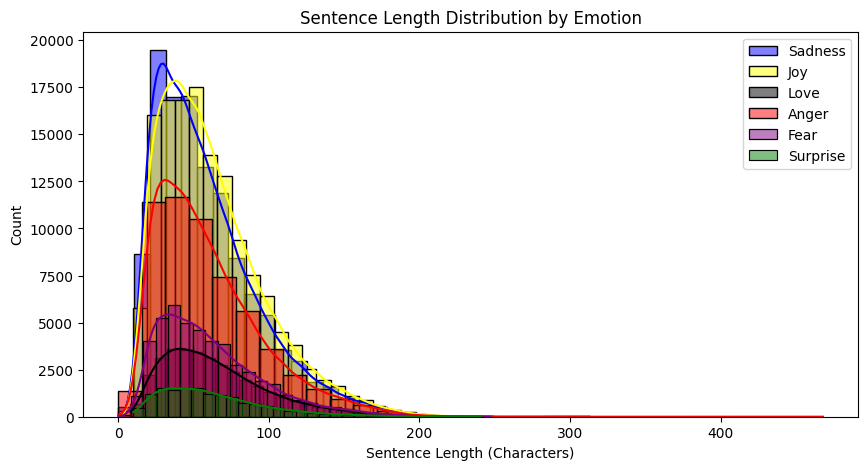

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Plot the distribution using emotion names
plt.figure(figsize=(10, 5))

# Plot for each emotion
sns.histplot(data[data["label"] == "Sadness"]["Cleaned_text_length"], bins=30, label="Sadness", kde=True, color="blue", alpha=0.5)
sns.histplot(data[data["label"] == "Joy"]["Cleaned_text_length"], bins=30, label="Joy", kde=True, color="yellow", alpha=0.5)
sns.histplot(data[data["label"] == "Love"]["Cleaned_text_length"], bins=30, label="Love", kde=True, color="black", alpha=0.5)
sns.histplot(data[data["label"] == "Anger"]["Cleaned_text_length"], bins=30, label="Anger", kde=True, color="red", alpha=0.5)
sns.histplot(data[data["label"] == "Fear"]["Cleaned_text_length"], bins=30, label="Fear", kde=True, color="purple", alpha=0.5)
sns.histplot(data[data["label"] == "Surprise"]["Cleaned_text_length"], bins=30, label="Surprise", kde=True, color="green", alpha=0.5)

# ✅ Add labels and legend
plt.legend()
plt.title("Sentence Length Distribution by Emotion")
plt.xlabel("Sentence Length (Characters)")
plt.ylabel("Count")
plt.show()

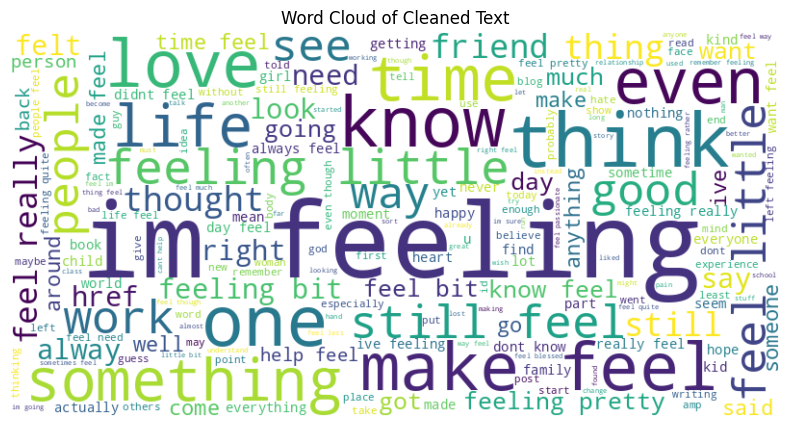

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ✅ Generate Word Cloud using "Cleaned_text" column
text = " ".join(data["Cleaned_text"])

# ✅ Create the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# ✅ Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Text")
plt.show()

# Fixing the labels

0


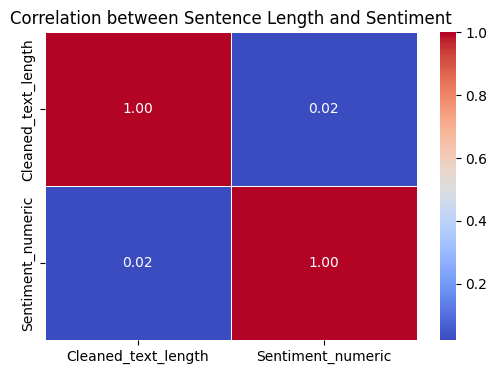

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Map the label to a meaningful numeric value
emotion_mapping = {
    "Sadness": 0,
    "Joy": 1,
    "Love": 2,
    "Anger": 3,
    "Fear": 4,
    "Surprise": 5  # Added missing label
}

# ✅ Apply mapping
data["Sentiment_numeric"] = data["label"].map(emotion_mapping)

# ✅ Check for unmapped values
print(data["Sentiment_numeric"].isna().sum())  # Should be 0 if all mapped correctly

# ✅ Add a column for sentence length
data["Cleaned_text_length"] = data["Cleaned_text"].apply(len)

# ✅ Compute correlation
correlation = data[["Cleaned_text_length", "Sentiment_numeric"]].corr()

# ✅ Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Sentence Length and Sentiment")
plt.show()

# Checking class Imbalance

<ipython-input-23-90513a721fc0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette="viridis")


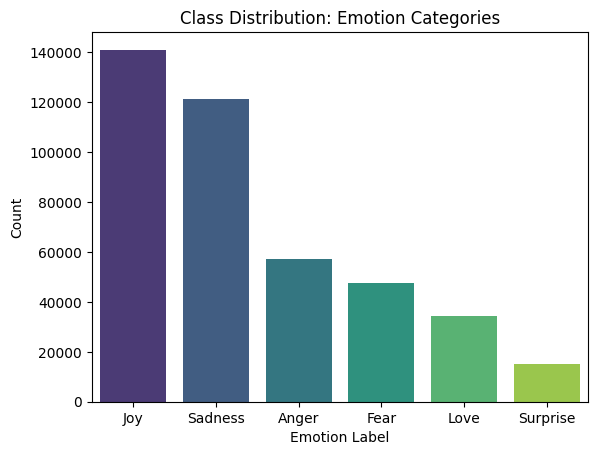


Percentage Distribution:
label
Joy         33.844519
Sadness     29.074948
Anger       13.751383
Fear        11.446970
Love         8.290128
Surprise     3.592053
Name: proportion, dtype: float64


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Visualizing the class imbalance using "label" column
sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette="viridis")
plt.title("Class Distribution: Emotion Categories")
plt.xlabel("Emotion Label")
plt.ylabel("Count")
plt.show()

# ✅ Displaying the percentage split
label_counts = data['label'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:")
print(label_counts)

In [24]:
# ✅ Displaying the percentage split using "label" column
label_counts = data['label'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:")
print(label_counts)


Percentage Distribution:
label
Joy         33.844519
Sadness     29.074948
Anger       13.751383
Fear        11.446970
Love         8.290128
Surprise     3.592053
Name: proportion, dtype: float64


# Model Training

## **Splitting data**

In [25]:
# ✅ Method 1
X = data['Cleaned_text']
y = data['label']

# ✅ Method 2
X = data.iloc[:, 2]  # Selects 'Cleaned_text'
y = data.iloc[:, 1]  # Selects 'label'

X

,Cleaned_text
0,feel really helpless heavy hearted
1,ive enjoyed able slouch relax unwind frankly n...
2,gave internship dmrg feeling distraught
3,dont know feel lost
4,kindergarten teacher thoroughly weary job take...
...,...
416804,feel like telling horny devil find site suited...
416805,began realize feeling agitated restless would ...
416806,feel curious previous early dawn time seek tro...
416807,feel becuase tyranical nature government el sa...


In [26]:
y

,label
0,Fear
1,Sadness
2,Fear
3,Sadness
4,Fear
...,...
416804,Love
416805,Anger
416806,Surprise
416807,Anger


## **Checking unique values in y**

In [27]:
#method 1
y.unique()

array(['Fear', 'Sadness', 'Love', 'Joy', 'Surprise', 'Anger'],
      dtype=object)

In [28]:
#method 2
y.value_counts()

,count
label,
Joy,141067
Sadness,121187
Anger,57317
Fear,47712
Love,34554
Surprise,14972


<Axes: xlabel='label', ylabel='count'>

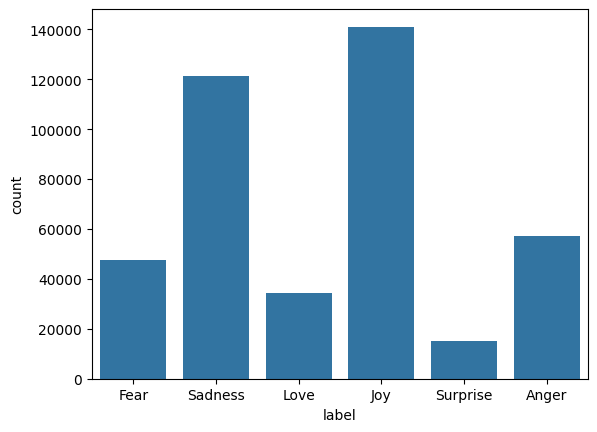

In [29]:
#method 3
sns.countplot(x = y)

## **Preprocessing**

### **Handling  Null**

In [30]:
y.isnull().sum()

np.int64(0)

### **Emotions**

In [31]:
# ✅ Extract each emotion using the "label" column
sadness_data = data[data['label'] == 0]  # Sadness
joy_data = data[data['label'] == 1]      # Joy
love_data = data[data['label'] == 2]     # Love
anger_data = data[data['label'] == 3]    # Anger
fear_data = data[data['label'] == 4]     # Fear

# ✅ Display results
print("Sadness Data:")
print(sadness_data)

print("\nJoy Data:")
print(joy_data)

print("\nLove Data:")
print(love_data)

print("\nAnger Data:")
print(anger_data)

print("\nFear Data:")
print(fear_data)

Sadness Data:
Empty DataFrame
Columns: [text, label, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []

Joy Data:
Empty DataFrame
Columns: [text, label, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []

Love Data:
Empty DataFrame
Columns: [text, label, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []

Anger Data:
Empty DataFrame
Columns: [text, label, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []

Fear Data:
Empty DataFrame
Columns: [text, label, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []


## WordCloud for each emotion

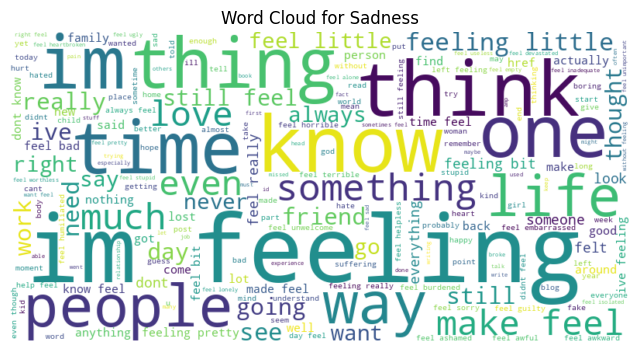

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sadness_data = data[data["label"] == "Sadness"]

def create_wordcloud(data, emotion_name):
    if data.empty:
        print(f"No data available for {emotion_name}, skipping word cloud.")
        return

    text = " ".join(data["Cleaned_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {emotion_name}")
    plt.show()

create_wordcloud(sadness_data, "Sadness")

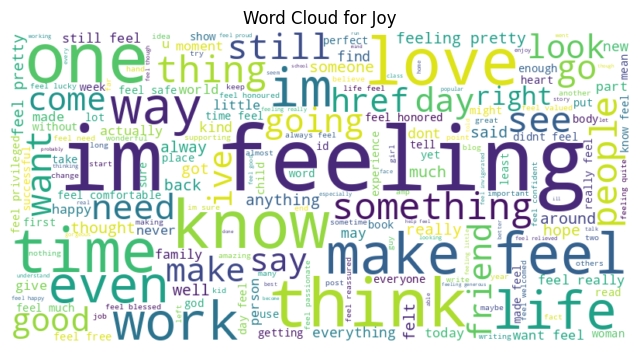

In [33]:
joy_data = data[data["label"] == "Joy"]
create_wordcloud(joy_data, "Joy")

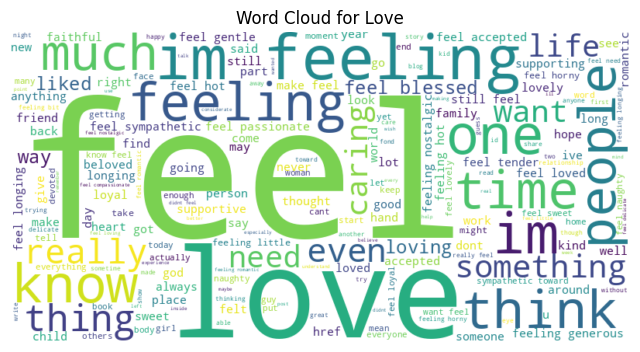

In [34]:
love_data = data[data["label"] == "Love"]
create_wordcloud(love_data, "Love")

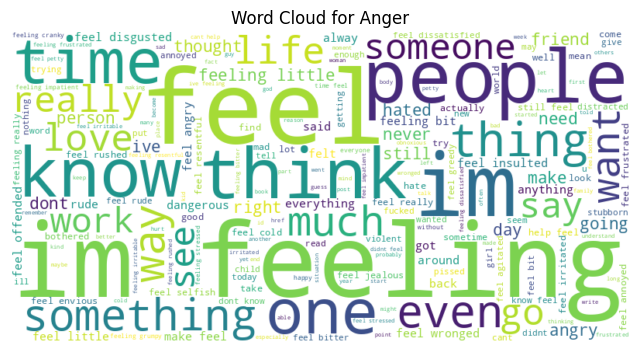

In [35]:
anger_data = data[data["label"] == "Anger"]
create_wordcloud(anger_data, "Anger")

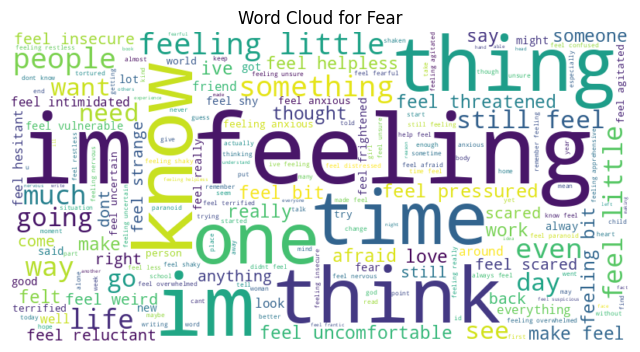

In [36]:
fear_data = data[data["label"] == "Fear"]
create_wordcloud(fear_data, "Fear")

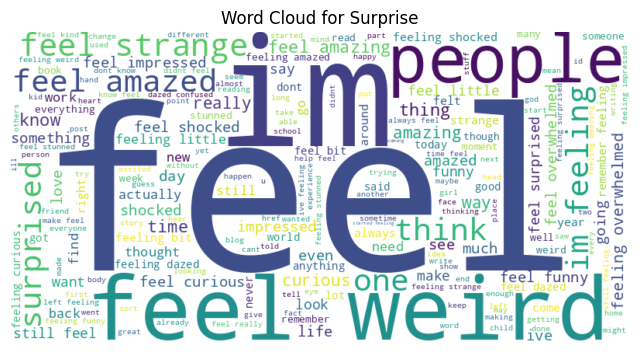

In [37]:
surprise_data = data[data["label"] == "Surprise"]
create_wordcloud(surprise_data, "Surprise")

# Vectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# ✅ Use Cleaned_text for vectorization
X = data["Cleaned_text"].astype(str)  # Ensure it's a string

# ✅ Apply CountVectorizer
vec = CountVectorizer(stop_words='english')
X_vectorized = vec.fit_transform(X)  # Store transformed data separately

# ✅ Check shape of transformed data
print(X_vectorized.shape)  # (num_samples, num_features)

(416809, 67438)


In [39]:
vec.vocabulary_

{'feel': 20780,
 'really': 48019,
 'helpless': 26366,
 'heavy': 26207,
 'hearted': 26143,
 'ive': 30353,
 'enjoyed': 18704,
 'able': 152,
 'slouch': 54398,
 'relax': 48823,
 'unwind': 63128,
 'frankly': 22267,
 'needed': 39915,
 'week': 65064,
 'end': 18538,
 'uni': 62555,
 'expo': 19962,
 'lately': 33289,
 'started': 56213,
 'feeling': 20804,
 'bit': 6017,
 'listless': 34321,
 'good': 24226,
 'thing': 59540,
 'gave': 23282,
 'internship': 29728,
 'dmrg': 16385,
 'distraught': 16225,
 'dont': 16606,
 'know': 32489,
 'lost': 34827,
 'kindergarten': 32246,
 'teacher': 58722,
 'thoroughly': 59635,
 'weary': 64988,
 'job': 31012,
 'taken': 58335,
 'university': 62643,
 'entrance': 18848,
 'exam': 19606,
 'suffered': 57303,
 'anxiety': 2560,
 'want': 64711,
 'carry': 8869,
 'work': 66171,
 'study': 56982,
 'alternative': 1794,
 'beginning': 5234,
 'quite': 47331,
 'disheartened': 15925,
 'think': 59546,
 'whomever': 65517,
 'lucky': 35045,
 'stay': 56282,
 'suite': 57365,
 'like': 34085,
 '

In [40]:
len(vec.vocabulary_) # to get len of all vocabulary

67438

In [41]:
vec.vocabulary_['ashamed'] # to get no of vocabulary of particalar word

3320

## Splitting

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

## SMOTE analysis

In [43]:
# ✅ Install imbalanced-learn if not installed
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# ✅ Use X_vectorized directly since vectorization is already done
y = data["label"]  # Use the existing label column

# ✅ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# ✅ Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ✅ Check the new class distribution
print("New class distribution:\n", pd.Series(y_resampled).value_counts())

New class distribution:
 label
Sadness     112903
Joy         112903
Anger       112903
Fear        112903
Love        112903
Surprise    112903
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

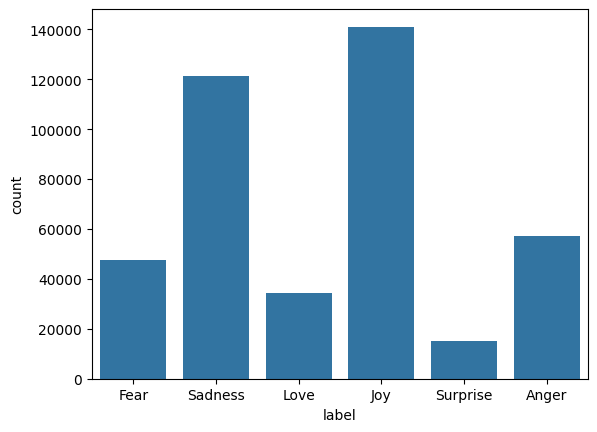

In [44]:
sns.countplot(x = y)

## **Training model**

In [45]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [46]:
mnb.score(X_train,y_train)

0.8928525372847859

In [47]:
mnb.score(X_test,y_test)

0.8659581104100189

In [48]:
mnb.classes_ #the sequence of confussion matrix

array(['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], dtype='<U8')

## Model Evaluation

In [49]:
y_pred = mnb.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[ 9764,   375,   169,    65,   331,    39],
       [  262,  7878,   186,    40,   266,   707],
       [  425,   404, 26208,  2181,   761,   727],
       [   55,    28,   708,  4352,    73,    21],
       [  927,   807,   835,   289, 22742,   295],
       [    8,   102,    58,     2,    28,  1244]])

In [50]:
# Display accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy and classification report
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8660

Classification Report:
              precision    recall  f1-score   support

       Anger       0.91      0.85      0.88     11441
        Fear       0.84      0.82      0.83      9594
         Joy       0.85      0.93      0.89     28164
        Love       0.83      0.63      0.72      6929
     Sadness       0.88      0.94      0.91     24201
    Surprise       0.86      0.41      0.56      3033

    accuracy                           0.87     83362
   macro avg       0.86      0.76      0.80     83362
weighted avg       0.87      0.87      0.86     83362



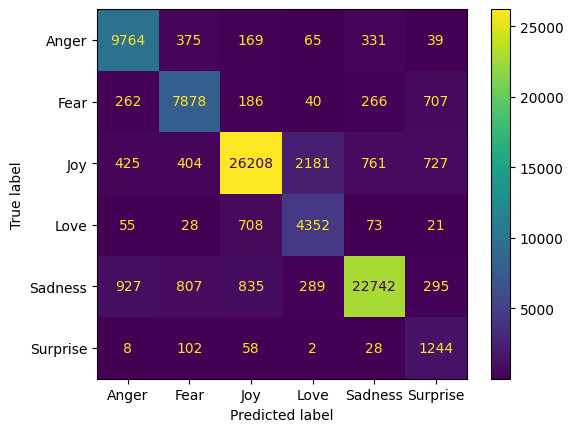

In [51]:
ConfusionMatrixDisplay(cm, display_labels = mnb.classes_ ).plot()

In [52]:
# ✅ Emotion examples
emotion_examples = {
    "Sadness": "I feel so lonely.",
    "Joy": "I am extremely happy and excited today!",
    "Love": "I cherish and adore every moment with you.",
    "Anger": "I am so mad about this situation!",
    "Fear": "I'm terrified of what might happen next.",
    "Surprise": "I'm shocked!"
}

# ✅ Predicting Emotions
for emotion, sample_text in emotion_examples.items():
    # Vectorize the input
    sample_transformed = vec.transform([sample_text])

    # Predict the emotion
    predicted_label = mnb.predict(sample_transformed)[0]  # Directly a string label

    # No need for reverse mapping, directly compare
    predicted_emotion = predicted_label

    print(f"Input Text: {sample_text}")
    print(f"Expected Emotion: {emotion}")
    print(f"Predicted Emotion: {predicted_emotion}\n")

Input Text: I feel so lonely.
Expected Emotion: Sadness
Predicted Emotion: Sadness

Input Text: I am extremely happy and excited today!
Expected Emotion: Joy
Predicted Emotion: Joy

Input Text: I cherish and adore every moment with you.
Expected Emotion: Love
Predicted Emotion: Joy

Input Text: I am so mad about this situation!
Expected Emotion: Anger
Predicted Emotion: Anger

Input Text: I'm terrified of what might happen next.
Expected Emotion: Fear
Predicted Emotion: Fear

Input Text: I'm shocked!
Expected Emotion: Surprise
Predicted Emotion: Surprise



In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib

# ✅ Example data including "Surprise"
X_train = [
    "I feel so lonely",       # Sadness
    "I am extremely happy",   # Joy
    "I cherish moments",      # Love
    "I am furious",           # Anger
    "I am scared",            # Fear
    "Wow, I did not see that coming!"  # Surprise
]

# ✅ Updated Labels
y_train = [0, 1, 2, 3, 4, 5]  # 0: Sadness, 1: Joy, 2: Love, 3: Anger, 4: Fear, 5: Surprise

# ✅ Train vectorizer and model
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# ✅ Save model and vectorizer
joblib.dump(model, "emotion_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
